In [2]:
import pandas as pd

%reload_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from src import DATA_DIR

from notebooks.utils import show_images

In [3]:
df_train: pd.DataFrame = pd.read_csv(DATA_DIR / "train.csv")
df_test: pd.DataFrame = pd.read_csv(DATA_DIR / "sample_submission.csv")

In [4]:
df_train.head()

image             species individual_id
0  00021adfb725ed.jpg  melon_headed_whale  cadddb1636b9
1  000562241d384d.jpg      humpback_whale  1a71fbb72250
2  0007c33415ce37.jpg  false_killer_whale  60008f293a2b
3  0007d9bca26a99.jpg  bottlenose_dolphin  4b00fe572063
4  00087baf5cef7a.jpg      humpback_whale  8e5253662392

## Random samples from test set

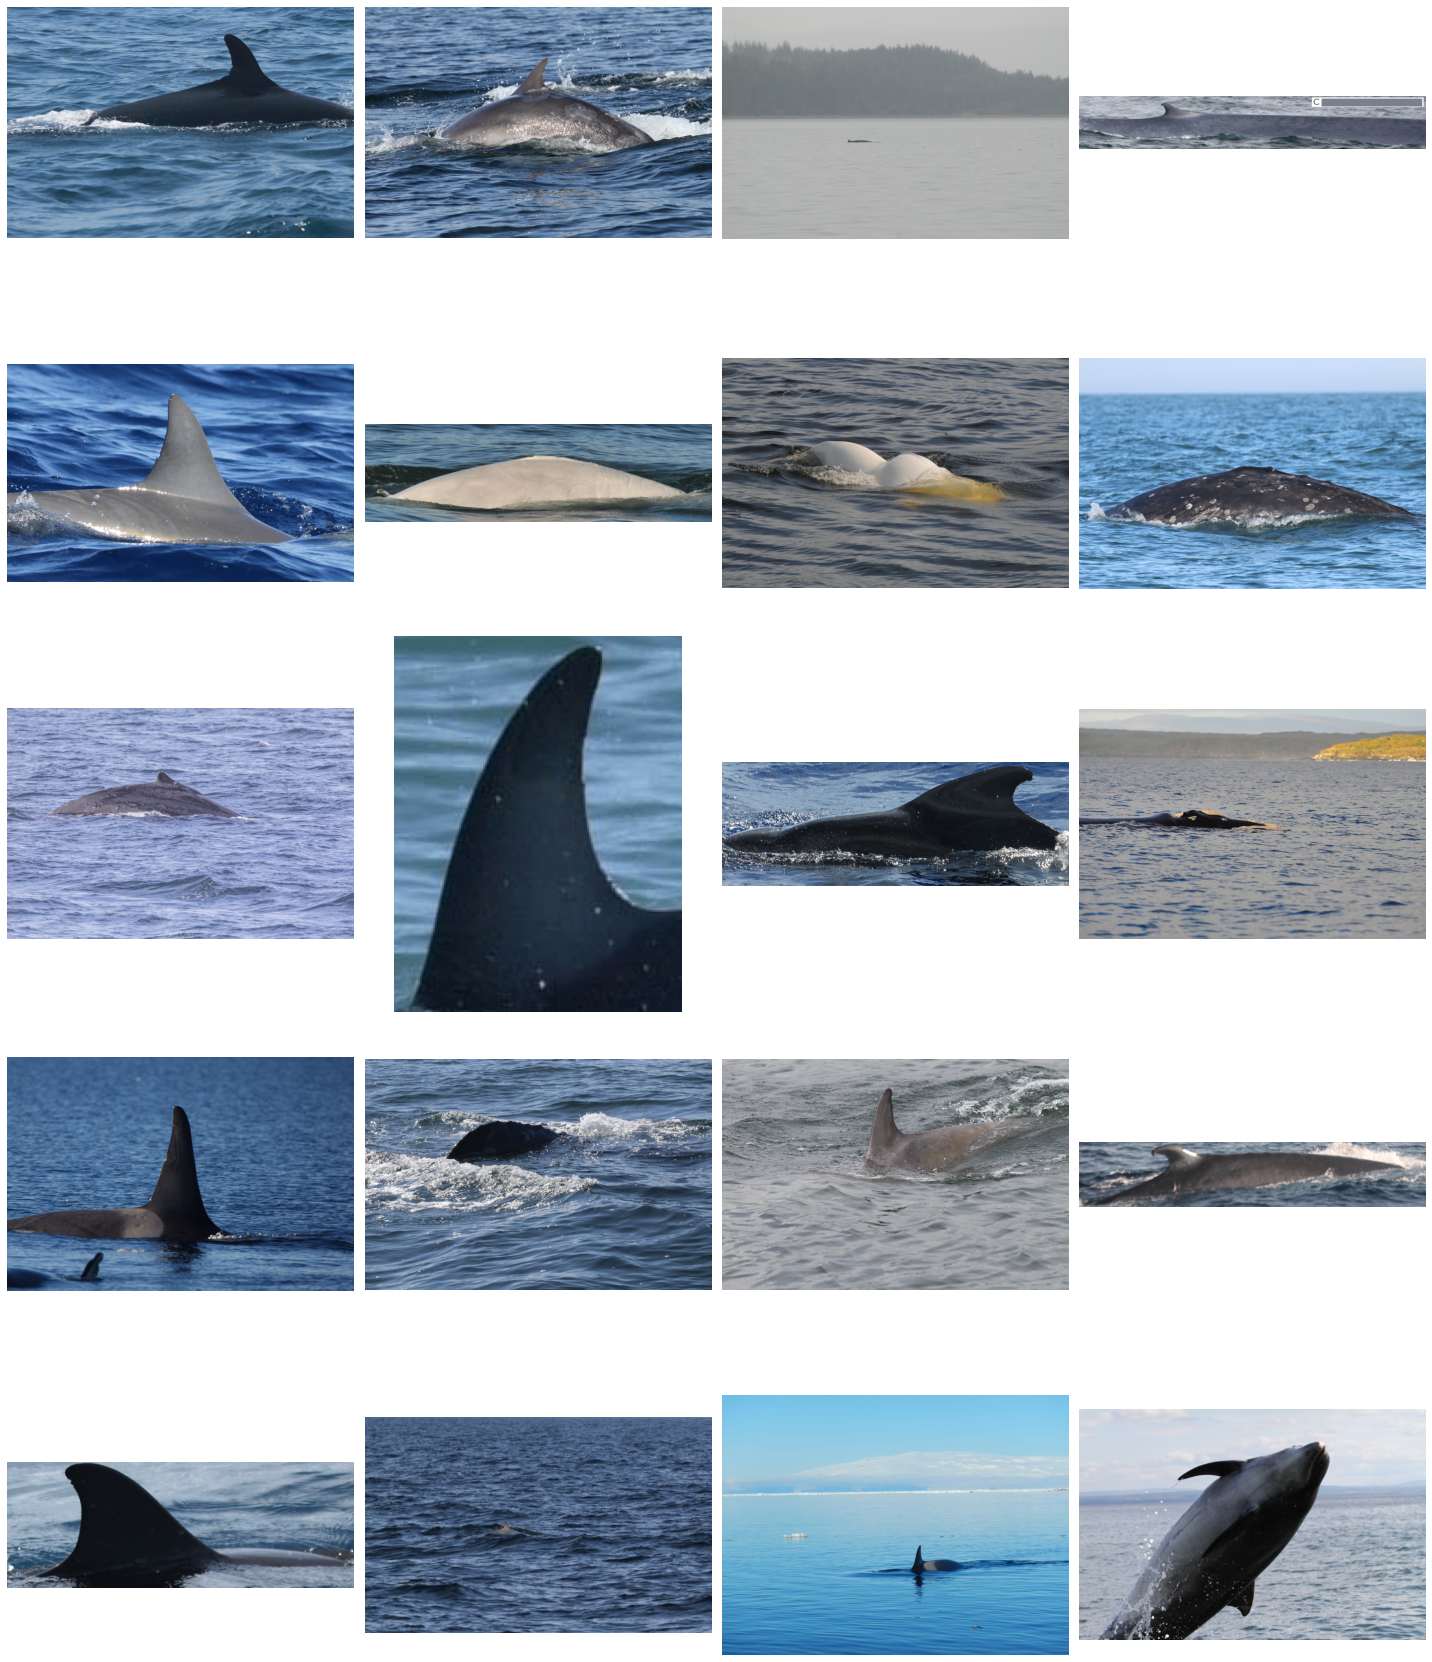

In [5]:
show_images(df_test.sample(20))

## Random sample of one individual (train set)

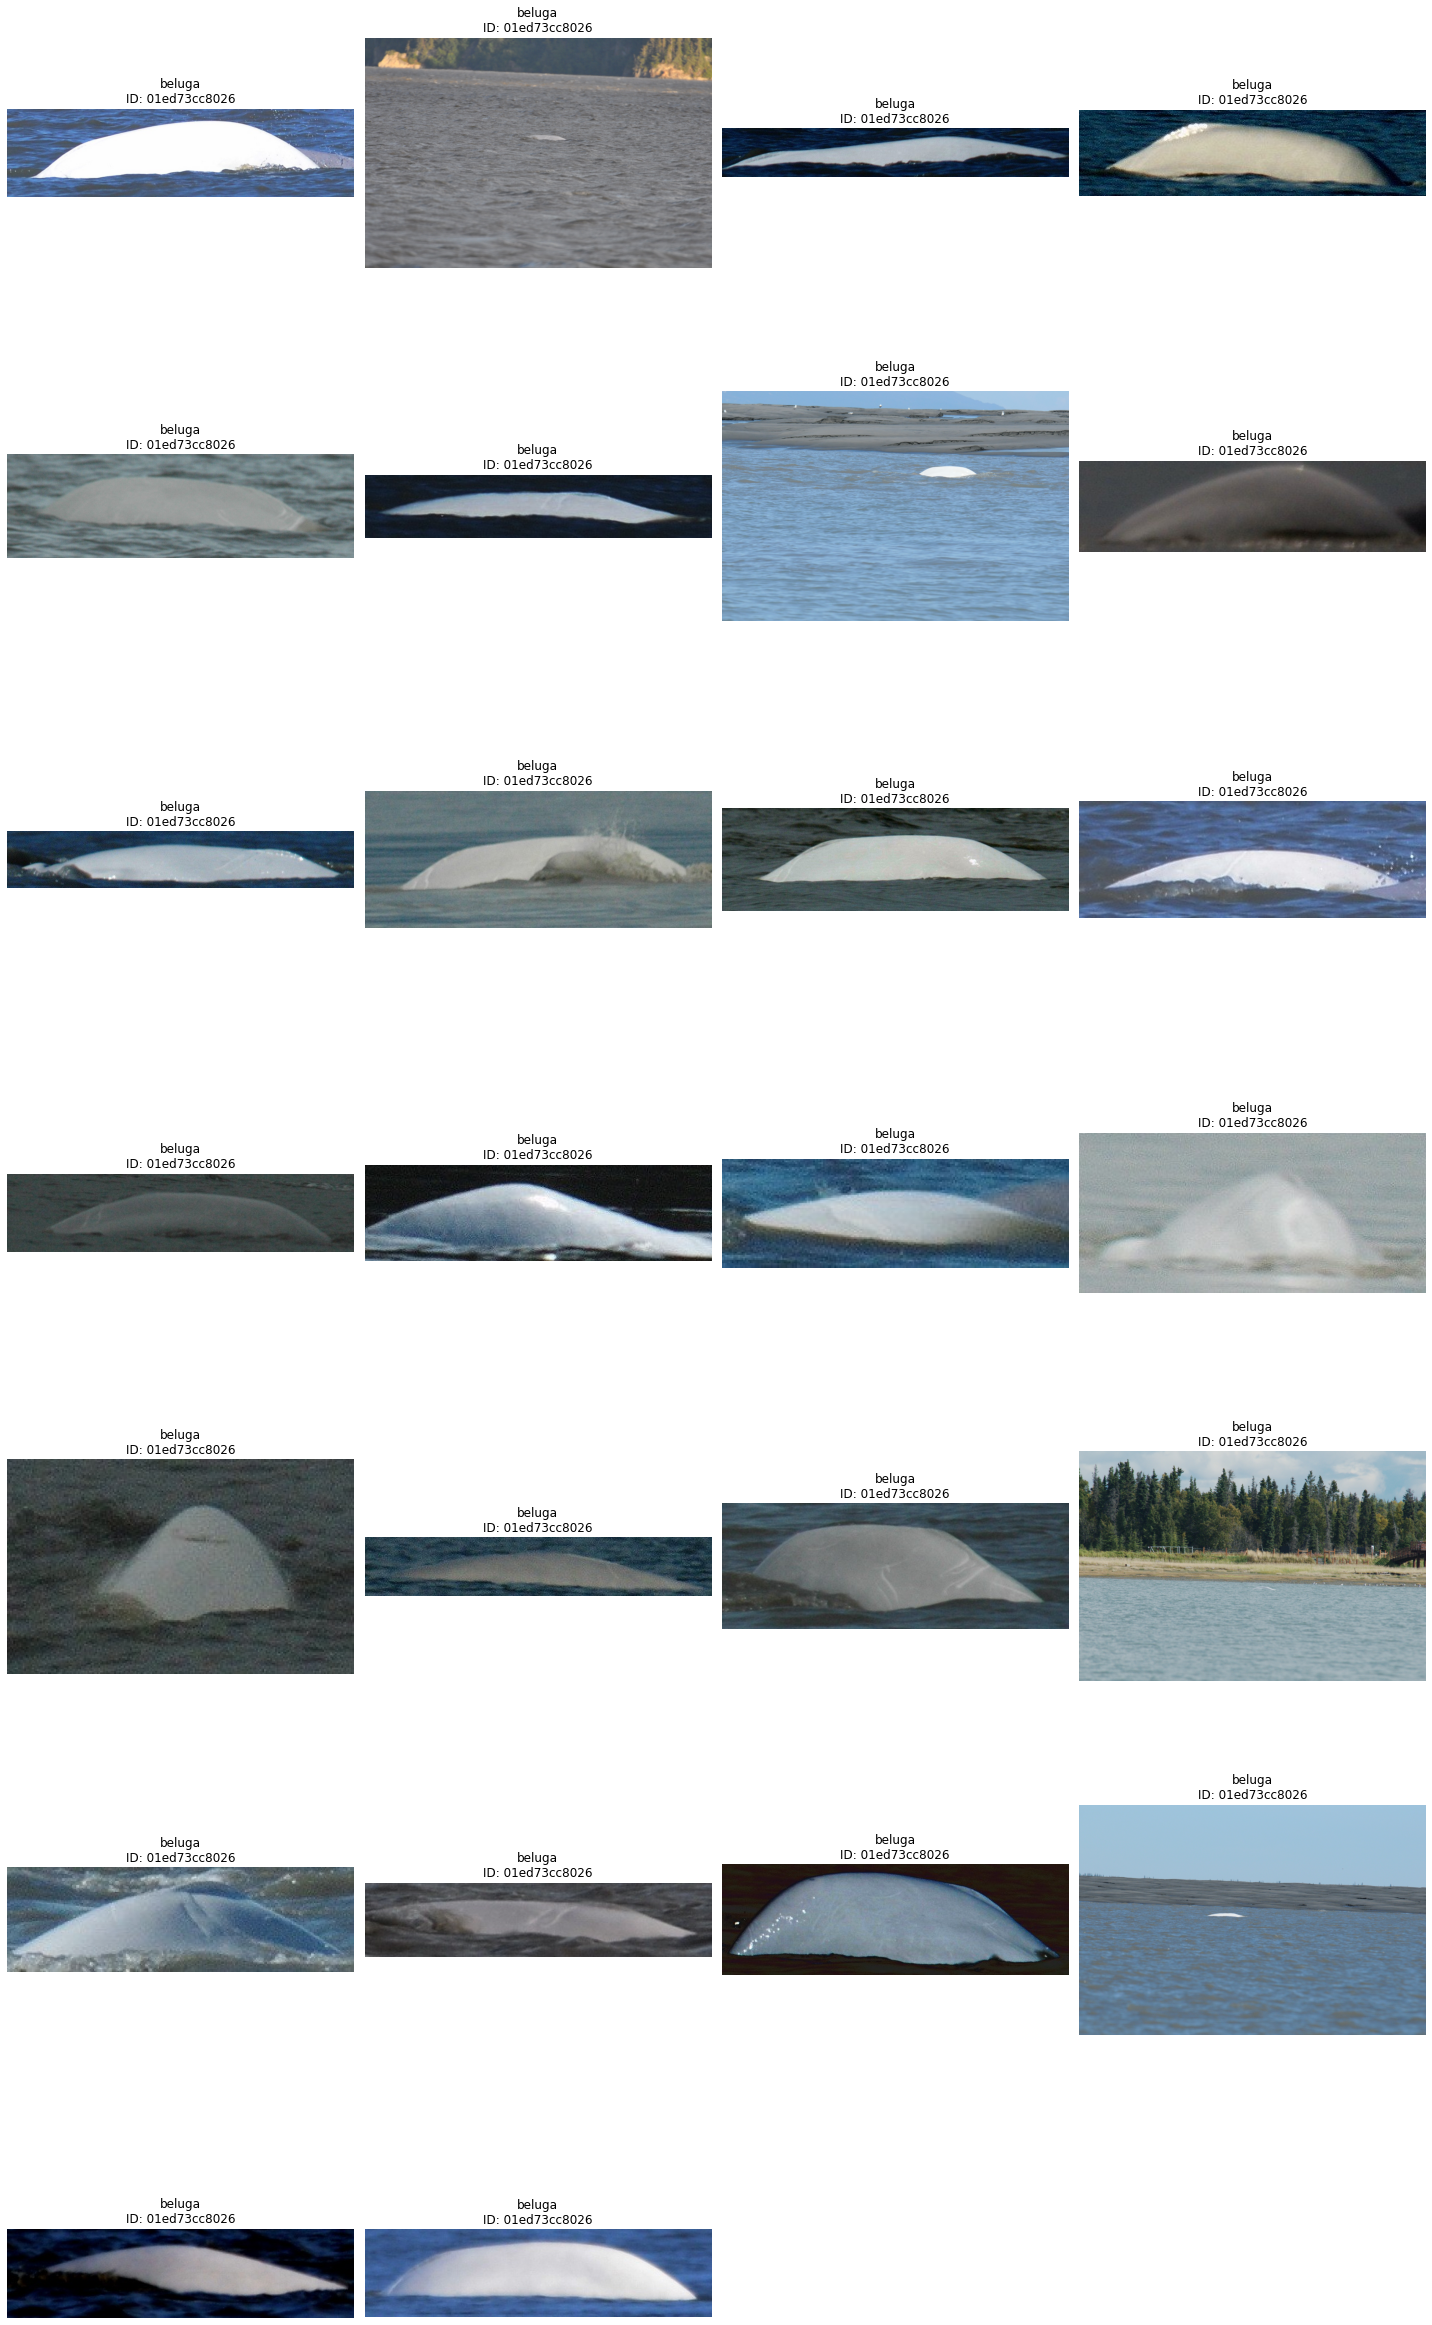

In [6]:
for _, group in df_train.groupby("individual_id"):
    if len(group) < 30 and len(group) > 10:
        show_images(group)
        break

## 51033 images in total

In [7]:
len(df_train)

51033

## 15587 labeled individuals

In [8]:
df_train["individual_id"].nunique()

15587

In [11]:
df_train

image               species individual_id
0      00021adfb725ed.jpg    melon_headed_whale  cadddb1636b9
1      000562241d384d.jpg        humpback_whale  1a71fbb72250
2      0007c33415ce37.jpg    false_killer_whale  60008f293a2b
3      0007d9bca26a99.jpg    bottlenose_dolphin  4b00fe572063
4      00087baf5cef7a.jpg        humpback_whale  8e5253662392
...                   ...                   ...           ...
51028  fff639a7a78b3f.jpg                beluga  5ac053677ed1
51029  fff8b32daff17e.jpg  cuviers_beaked_whale  1184686361b3
51030  fff94675cc1aef.jpg            blue_whale  5401612696b9
51031  fffbc5dd642d8c.jpg                beluga  4000b3d7c24e
51032  fffdcd42312777.jpg    bottlenose_dolphin  4ddb2eeb5efb

[51033 rows x 3 columns]

## 9258 individuals with only one train image

In [9]:
idvs_with_only_one_train_image = (
    df_train["individual_id"].value_counts().to_frame().query("individual_id == 1").index.tolist()
)

len(idvs_with_only_one_train_image)

9258

In [12]:
df_train["individual_id"].value_counts().to_frame().query("individual_id == 1")

individual_id
010d4462e262              1
296c1b024a3d              1
7dcc7976f08b              1
aa404f34ea9d              1
9c2f2fb97f24              1
...                     ...
7da30c559ad2              1
882c59ba34bb              1
704e724a033f              1
08983c540e76              1
bc6fcab946c4              1

[9258 rows x 1 columns]